# 1. Import uesful libraries

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#better visualization
from mlxtend.plotting import plot_decision_regions

# 2. Data exploration

In [39]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

print("train shape: {}, test shape: {}".format(train.shape, test.shape))
train.head(10)

train shape: (891, 12), test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# let's see more information about the dataset
profile = ProfileReport(train)
profile.to_file('titanic_dataset_report.html') # it will create a html file inside the project directory

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.1 Data cleaning

In [72]:
# For this assignment,  we only use some of the features for better intuition and also visualization :)

features = ['Age', 'Sex', 'Fare']

train_feat, test_feat = train[features], test[features]
train_label = train['Survived']

In [73]:
# number of missing values per feature
train_feat.isna().sum()

Age     177
Sex       0
Fare      0
dtype: int64

In [74]:
# now lets impute them :) There are lots of ways to impute
# missing values but here we use the easiest one.

train_feat.Age.fillna(train_feat.Age.mean(), inplace=True)
test_feat.Age.fillna(test_feat.Age.mean(), inplace=True)

/Users/mohammad/venv/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [75]:
# here we ignore the cabin feature and we will not take advantage of  it in training our models
# so lets check the missing values again

train_feat.isna().sum()

Age     0
Sex     0
Fare    0
dtype: int64

In [76]:
# now its time to convert categorical features into their one-hot encoded representations

train_feat = pd.get_dummies(train_feat, drop_first=True)
test_feat = pd.get_dummies(test_feat, drop_first=True)

## 2.2 Normalization

In [84]:
# we must normalize non-categorical features for more appropriate optimziation

min_max_scaler = MinMaxScaler()

train_feat[['Age', 'Fare']] = min_max_scaler.fit_transform(train_feat[['Age', 'Fare']].values)
test_feat[['Age', 'Fare']] = min_max_scaler.transform(test_feat[['Age', 'Fare']].values)

In [86]:
# Finally we split our dataset into train/test/valid

X_train, X_val, y_train, y_val = train_test_split(train_feat, train_label, test_size=0.1)
X_test = test_feat


print("X_train shape: {}, X_val shape: {}".format(X_train.shape, X_val.shape))

X_train shape: (801, 3), X_val shape: (90, 3)


# 3. ML models

## 3.1 KNN

In [87]:
def knn_visualization(X_train, y_train, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    #plot decision regions
    plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Knn with K=' + str(k))
    plt.show()

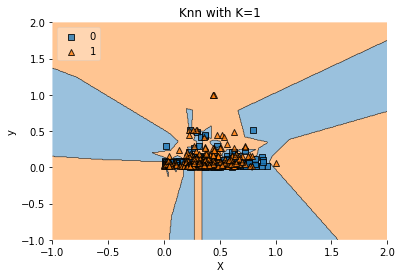

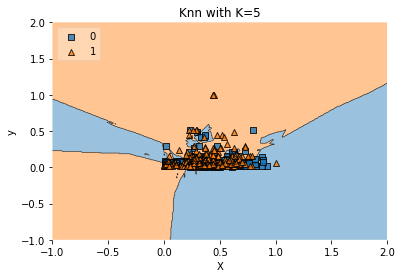

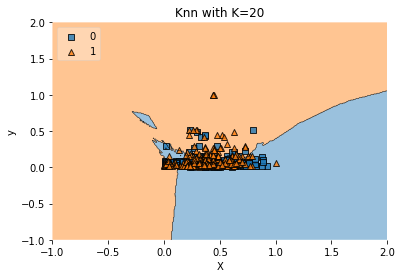

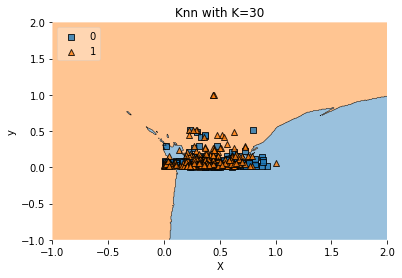

In [88]:
for k in [1,5,20,30]:
    knn_visualization(X_train[['Age', 'Fare']].values, y_train.values, k)

In [71]:
X_train.values

array([[29.69911765,  1.        ],
       [ 0.75      ,  0.        ],
       [ 4.        ,  1.        ],
       ...,
       [42.        ,  1.        ],
       [36.        ,  1.        ],
       [41.        ,  0.        ]])